In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import WeibullAFTFitter
from functions import wb_AFT_reg, compare_residuals

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
cols_to_drop = ['FALLA','FECHA','REP','CAEX','SISTEMA']
residuals = []

df = pd.read_excel('.\data.xlsx')
data = df[df.SISTEMA =='Vvolts'] # Select the caex sistem
data_to_eval = data.drop(cols_to_drop,axis=1).reset_index(drop=True)

# Model A1

In [435]:
wb_AFT_reg(data=data[['TBF']],time_variable='TBF',residuals_list=residuals,ndecimals=3, print_results=True)

Estimated scale parameter λ =  1508.4833124490617


<lifelines.WeibullAFTFitter: fitted with 1615 total observations, 0 right-censored observations>
             duration col = 'TBF'
   number of observations = 1615
number of events observed = 1615
           log-likelihood = -13613.845
         time fit was run = 2023-01-08 14:50:31 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                         
lambda_ Intercept  7.319   1508.483      0.042            7.237            7.401             1389.304             1637.886
rho_    Intercept -0.474      0.623      0.020           -0.513           -0.434                0.599                0.648

                    cmp to       z       p   -log2(p)
param   covariate                                    
lambda_ Intercept    0.000 174.294 <0.0005        inf
rho_    Intercept    0.000 -23.612 <0.0005    407.072
---
Concordance = 0.500
AIC = 27231.690
log-likelihood ratio test = -0.000 on 0 df
-log2(p) of ll-ratio test = nan

## Modelo A2

In [436]:
wb_AFT_reg(data=data_to_eval,time_variable='TBF',residuals_list=residuals,ndecimals=3, print_results=True)

Estimated scale parameter λ =  1094.6769654869497


<lifelines.WeibullAFTFitter: fitted with 1615 total observations, 0 right-censored observations>
             duration col = 'TBF'
   number of observations = 1615
number of events observed = 1615
           log-likelihood = -13587.550
         time fit was run = 2023-01-08 14:50:46 UTC

---
                                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                             
lambda_ Consumo                        0.015      1.015      0.009           -0.003            0.032                0.997                1.032
        Estanque_remanente            -0.000      1.000      0.000           -0.001            0.001                0.999                1.001
        Horas_desde_ultima_mantencion -0.000      1.000      0.000           -0.000            0.000                1.000                1.000
        Horometro                      0.000      1.000      0.000            0.000            0.000                1.000                1.000
        Litros_ciclos                 -0.023      0.977      0.010           -0.043           -0.003                0.958                0.997
        Media_Dist_lleno              -0.000      1.000      0.001           -0.002            0.001                0.998                1.001
        Media_Dist_vacio               0.000      1.000      0.001           -0.002            0.003                0.998                1.003
        Media_Disteq_lleno_2           0.000      1.000      0.000           -0.001            0.001                0.999                1.001
        Media_Disteq_vacio_2          -0.000      1.000      0.001           -0.002            0.001                0.998                1.001
        Media_tiempo_viajelleno       -0.002      0.998      0.003           -0.008            0.005                0.992                1.005
        Media_tiempo_viajevacio        0.002      1.003      0.002           -0.002            0.007                0.998                1.007
        Pendiente_lleno               -0.144      0.866      2.003           -4.069            3.782                0.017               43.907
        Pendiente_vacio               -9.726      0.000      5.660          -20.820            1.368                0.000                3.926
        TiempoCiclo                    0.001      1.001      0.001           -0.001            0.004                0.999                1.004
        Tiempoviaje_lleno              0.000      1.000      0.000           -0.000            0.000                1.000                1.000
        Tiempoviaje_vacio              0.000      1.000      0.000           -0.000            0.000                1.000                1.000
        TonelajeProm                  -0.004      0.996      0.011           -0.025            0.018                0.976                1.018
        Velocidad_lleno               -0.013      0.988      0.144           -0.295            0.270                0.744                1.310
        Velocidad_vacio                0.054      1.055      0.045           -0.034            0.142                0.966                1.152
        cant_fase10                   -0.026      0.975      0.025           -0.074            0.023                0.929                1.023
        cant_fase11                   -0.004      0.996      0.028           -0.059            0.052                0.943                1.053
        cant_fase12                   -0.008      0.992      0.020           -0.048            0.032                0.953                1.032
        cant_fase13                   -0.025      0.975      0.028           -0.080            0.029                0.923                1.029
        cant_fase9                    -0.005      0.995      0.041           -0.086            0.076                0.917           

# PLOT RESIDUOS

Model A1 d = 2.6007090007506486
Model A2 d = 3.1432606992659684


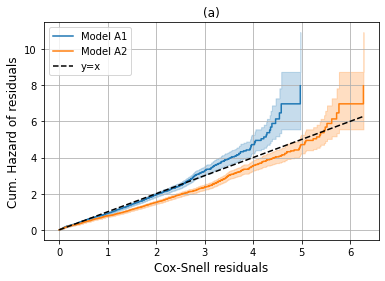

In [424]:
fig, ax = plt.subplots()
dA1 = compare_residuals(ax=ax,residual=residuals[0],model_name="Model A1", print_results=True)
dA2 = compare_residuals(ax=ax,residual=residuals[1],model_name="Model A2", print_results=True)

maxs = np.max([max(residuals[0]),max(residuals[1])])
mins = np.min([min(residuals[0]),min(residuals[1])])
iden =  np.linspace(mins,maxs,num=len(residuals[1]))

# Identity function
ax.plot(iden,iden,c='black', label="y=x",linestyle='--')


plt.title('(a)')
plt.legend(loc='upper left')
plt.xlabel("Cox-Snell residuals", fontsize=12)
plt.ylabel("Cum. Hazard of residuals", fontsize=12)
plt.grid('on')

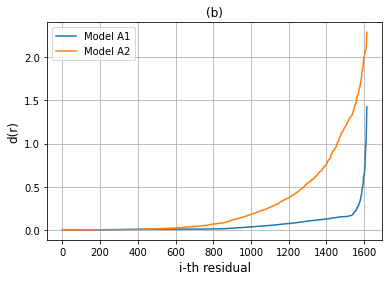

In [184]:
pd.DataFrame({'Model A1':dA1,'Model A2':dA2}).plot()
plt.title('(b)')
plt.ylabel("d(r)", fontsize=12)
plt.xlabel("i-th residual", fontsize=12)
plt.grid('on')

## qq-plots

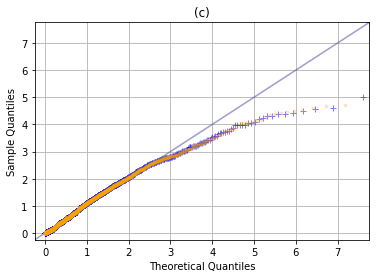

In [282]:
fig, ax = plt.subplots()

pp = sm.ProbPlot(np.array(residuals[0]), dist=stats.weibull_min,fit=True)
qq = pp.qqplot(marker='+', markerfacecolor='blue', markeredgecolor='blue', alpha=0.5,ax=ax)
sm.qqline(qq.axes[0], line='45', fmt='blue+', alpha=0.4)

pp = sm.ProbPlot(np.array(residuals[1]), dist=stats.weibull_min,fit=True)
qq = pp.qqplot(marker='.', markerfacecolor='orange', markeredgecolor='orange', alpha=0.2,ax=ax)
sm.qqline(qq.axes[0], line='45', fmt='y--', alpha=0.2)

plt.title('(c)')
plt.grid('on')
plt.show()

### Regularización $L_1$

#### La librería lifelines permite incorporar una penalización  $L_1$ (Lasso) , la cual consiste en resolver 

$$\max_{\boldsymbol{\theta} \in \mathbb{R}^N} F(\boldsymbol{\theta}):= \sum_i l(\boldsymbol{\theta},\sigma,\textbf{x}_i) + \lambda ||\boldsymbol{\theta}||_1$$

###  ¿Cuál es el mejor valor de $\lambda$ ?

In [ ]:
lambdas = []
AICs = []
STDs = []
for p in np.linspace(1e-3, 0.2, 2000):
    
    dfs = np.array_split(data_to_eval,5)
    df1 = pd.concat([dfs[1],dfs[2],dfs[3],dfs[4]])
    df2 = pd.concat([dfs[0],dfs[2],dfs[3],dfs[4]])                
    df3 = pd.concat([dfs[0],dfs[1],dfs[3],dfs[4]]) 
    df4 = pd.concat([dfs[0],dfs[1],dfs[2],dfs[4]]) 
    df5 = pd.concat([dfs[0],dfs[1],dfs[2],dfs[3]])
    
    try:
        mean_aics = []
        for df in [df1,df2,df3,df4,df5]:
            # Filter variables using lasso
            # ===============================================================================
            aft = WeibullAFTFitter(l1_ratio=1., penalizer=p).fit(df, duration_col='TBF')

            aux_params = pd.DataFrame(aft.params_).reset_index().rename(columns={0:'coef'})
            aux_params = aux_params[:len(aux_params)-2]
            coef_selection = list(aux_params[aux_params.coef>1e-10].covariate)

            #================================================================================
            # Cox model with the selected variables
            # ========================================================================================
            new_aft = WeibullAFTFitter().fit(data_to_eval[['TBF']+coef_selection], duration_col='TBF')
            # ========================================================================================
            # Get the AIC
            # =========================
            mean_aics.append(new_aft.AIC_)
        
        STDs.append(np.std(mean_aics))
        AICs.append(np.mean(mean_aics))
        lambdas.append(p)
    except:
        continue

In [24]:
aic_df = pd.DataFrame({r'$\lambda$':lambdas,'AIC':AICs,r'$\sigma$':STDs}).set_index(r'$\lambda$')
aic_df['lower'] = aic_df['AIC'] - aic_df[r'$\sigma$']
aic_df['upper'] = aic_df['AIC'] + aic_df[r'$\sigma$']
aic_df[aic_df.AIC==aic_df.AIC.min()]

,AIC,$\sigma$,lower,upper
$\lambda$,,,,
0.084025,27231.915717,5.850562,27226.065155,27237.766279


The minimum is reached in λ = 0.08402451225612807


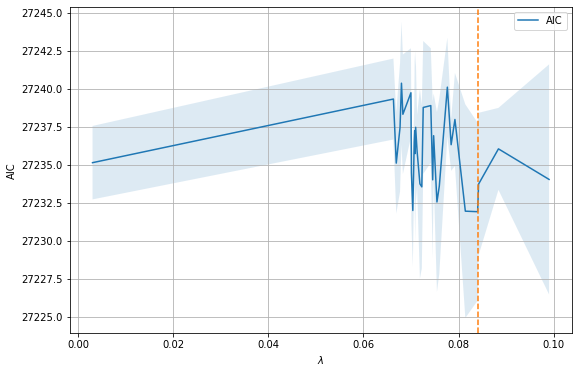

In [44]:
fig, ax = plt.subplots(figsize=(9, 6))

aic_df[['AIC']].plot(ax=ax)
ax.fill_between(aic_df.index, aic_df.lower, aic_df.upper, alpha=.15)

lmd_to_min = aic_df[aic_df.AIC == aic_df.AIC.min()].index[0]
print('The minimum is reached in λ =', lmd_to_min)

ax.set_ylabel("AIC")
ax.set_xlabel("$\lambda$")
ax.axvline(lmd_to_min, c="C1",linestyle='--')
ax.grid(True)

### Se toma entonces $\lambda\approx 0.084025$ 

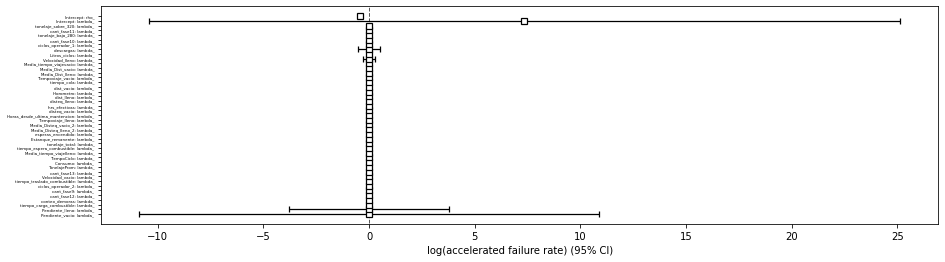

In [37]:
w = WeibullAFTFitter(l1_ratio=1., penalizer=0.084025).fit(data_to_eval, duration_col='TBF')
fig, ax = plt.subplots(figsize = (15,4))
w.plot(ax=ax)
plt.yticks(fontsize=4)
plt.show()

### Se ajusta el modelo con las variables filtradas por la regularización Lasso

In [34]:
res = pd.DataFrame(w.params_).reset_index()
res_lambda = res[res.param=='lambda_'].rename(columns={0:'theta'})
res_lambda = res_lambda[res_lambda.theta>1e-10]
lasso_variables = res_lambda.covariate.to_list()[:-1]

In [35]:
wb_AFT_reg(data=data[['TBF']+lasso_variables],time_variable='TBF',residuals_list=residuals,ndecimals=3, print_results=True)

Estimated scale parameter λ =  1779.2794696697247


<lifelines.WeibullAFTFitter: fitted with 1615 total observations, 0 right-censored observations>
             duration col = 'TBF'
   number of observations = 1615
number of events observed = 1615
           log-likelihood = -13607.595
         time fit was run = 2023-01-17 12:34:58 UTC

---
                             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                  
lambda_ cant_fase10        -0.033      0.967      0.010           -0.053           -0.014                0.949                0.986
        cant_fase11        -0.002      0.998      0.015           -0.031            0.027                0.969                1.028
        tonelaje_bajo_280  -0.008      0.993      0.010           -0.027            0.012                0.974                1.012
        tonelaje_sobre_320 -0.005      0.995      0.015           -0.034            0.023                0.966                1.023
        Intercept           7.532   1867.571      0.116            7.306            7.759             1488.643             2342.953
rho_    Intercept          -0.469      0.626      0.020           -0.508           -0.430                0.601                0.651

                             cmp to       z       p   -log2(p)
param   covariate                                             
lambda_ cant_fase10           0.000  -3.380   0.001     10.429
        cant_fase11           0.000  -0.131   0.896      0.159
        tonelaje_bajo_280     0.000  -0.769   0.442      1.177
        tonelaje_sobre_320    0.000  -0.376   0.707      0.500
        Intercept             0.000  65.101 <0.0005        inf
rho_    Intercept             0.000 -23.384 <0.0005    399.311
---
Concordance = 0.530
AIC = 27227.190
log-likelihood ratio test = 12.500 on 4 df
-log2(p) of ll-ratio test = 6.159

(     param           covariate     value
 0  lambda_         cant_fase10 -0.033458
 1  lambda_         cant_fase11 -0.001969
 2  lambda_   tonelaje_bajo_280 -0.007508
 3  lambda_  tonelaje_sobre_320 -0.005494
 4  lambda_           Intercept  7.532394,
   param  covariate     value
 5  rho_  Intercept -0.469143)

## $\lambda$ óptimo para cada sistema en cuestión

In [ ]:
cols_to_drop = ['FALLA','FECHA','REP','CAEX','SISTEMA']
residuals = []
aic_dfs = []
optimals_aic = []
data = pd.read_excel('.\data.xlsx')
for s in data.SISTEMA.unique():

    data_caex = data[data.SISTEMA ==s] # Select the caex sistem
    data_to_eval = data_caex.drop(cols_to_drop,axis=1).reset_index(drop=True)
    
    lambdas = []
    AICs = []
    STDs = []
    for p in np.linspace(1e-3, 0.2, 2000):

        dfs = np.array_split(data_to_eval,5)
        df1 = pd.concat([dfs[1],dfs[2],dfs[3],dfs[4]])
        df2 = pd.concat([dfs[0],dfs[2],dfs[3],dfs[4]])                
        df3 = pd.concat([dfs[0],dfs[1],dfs[3],dfs[4]]) 
        df4 = pd.concat([dfs[0],dfs[1],dfs[2],dfs[4]]) 
        df5 = pd.concat([dfs[0],dfs[1],dfs[2],dfs[3]])

        try:
            mean_aics = []
            for df in [df1,df2,df3,df4,df5]:
                # Filter variables using lasso
                # ===============================================================================
                aft = WeibullAFTFitter(l1_ratio=1., penalizer=p).fit(df, duration_col='TBF')

                aux_params = pd.DataFrame(aft.params_).reset_index().rename(columns={0:'coef'})
                aux_params = aux_params[:len(aux_params)-2]
                coef_selection = list(aux_params[aux_params.coef>1e-10].covariate)

                #================================================================================
                # Cox model with the selected variables
                # ========================================================================================
                new_aft = WeibullAFTFitter().fit(data_to_eval[['TBF']+coef_selection], duration_col='TBF')
                # ========================================================================================
                # Get the AIC
                # =========================
                mean_aics.append(new_aft.AIC_)

            STDs.append(np.std(mean_aics))
            AICs.append(np.mean(mean_aics))
            lambdas.append(p)
        except:
            continue
            
    aic_df = pd.DataFrame({r'$\lambda$':lambdas,'AIC':AICs,r'$\sigma$':STDs}) #.set_index(r'$\lambda$')
    aic_df['lower'] = aic_df['AIC'] - aic_df[r'$\sigma$']
    aic_df['upper'] = aic_df['AIC'] + aic_df[r'$\sigma$']
    aic_df['SISTEMA'] = [s]*len(aic_df)
    
    aic_dfs.append(aic_df)
    
    optimals_aic.append(aic_df[aic_df.AIC==aic_df.AIC.min()])

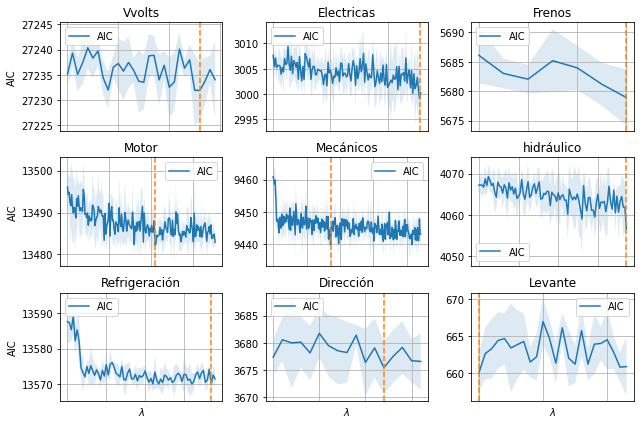

In [20]:
fig, ax = plt.subplots(3,3,figsize=(9, 6))
ci = [0,0,0,1,1,1,2,2,2]
cj =0
for a in aic_dfs:
    i = ci[cj]
    j = cj%3

    a[['AIC']].plot(ax=ax[i][j])
    ax[i][j].fill_between(a.index, a.lower, a.upper, alpha=.15)
    lmd_to_min = a[a.AIC == a.AIC.min()].index[0]
    ax[i][j].axvline(lmd_to_min, c="C1",linestyle='--')
    
    ax[i][j].set_title(a.SISTEMA.unique()[0])
    
    if j == 0:
        ax[i][j].set_ylabel("AIC")
    else:
        ax[i][j].set_ylabel("")
    
    if i==2:
        ax[i][j].set_xlabel("$\lambda$")
    else:
        ax[i][j].set_xlabel("")
    ax[i][j].tick_params(axis='x',which='both',  bottom=False,labelbottom=False)
        
        
    ax[i][j].grid(True)
    cj+=1
fig.tight_layout()

In [23]:
pd.concat(optimals_aic).drop_duplicates('SISTEMA',keep='first') #.to_excel('Optimals_AIC_WeibullAFTModels.xlsx',index=False)

,$\lambda$,AIC,$\sigma$,lower,upper,SISTEMA
26,0.084025,27231.915717,5.850562,27226.065155,27237.766279,Vvolts
128,0.123148,2999.032530,3.926580,2995.105950,3002.959110,Electricas
6,0.082631,5678.915599,4.787332,5674.128267,5683.702931,Frenos
105,0.060730,13482.173190,2.956817,13479.216373,13485.130007,Motor
86,0.177402,9439.800476,5.010920,9434.789556,9444.811396,Mecánicos
93,0.097464,4056.530257,7.593999,4048.936258,4064.124256,hidráulico
74,0.082034,13570.018178,2.168319,13567.849859,13572.186496,Refrigeración
12,0.052169,3675.462892,4.788005,3670.674887,3680.250897,Dirección
0,0.014539,660.025819,2.541222,657.484597,662.567041,Levante


In [24]:
#pd.concat(aic_dfs).to_excel('lambdas_AIC_WeibullAFTModels.xlsx',index=False)